Ideas:


*   Confuse the ANN models
    * Confuse only one model
    * Confuse more models and see which does better
    * Confuse using rotation/blurry/modification/etc.
*   Create output of accuracy on each layer in order to see how it improves/downgrades



# ANN Project - CIFAR-10 Dataset

## What does CIFAR-10 dataset contains?

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
The dataset is cached within the tensorflow Python package and has the following classes:
1. airplane
2. automobile
3. bird
4. cat
5. deer
6. dog
7. frog
8. horse
9. ship
10. truck

More information about this dataset can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html)

Now, let's go to the coding process

### Import libraries

In [104]:
from random import randint

import numpy as np
from keras import models, datasets, layers, Model
import tensorflow as tf
from keras.applications import ResNet50, DenseNet121
from keras.layers import GlobalAveragePooling2D, Dense
from keras.optimizers import Adam

tf.config.list_physical_devices('GPU')

import matplotlib.pyplot as plt

### Loading data

In [47]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

height, width, channels = 32, 32, 3
nb_classes = 10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train_original = x_train.copy()
x_test_original = x_test.copy()
y_train_original = y_train.copy()
y_test_original = y_test.copy()

x_train = x_train.reshape((-1, height, width, channels))
x_test = x_test.reshape((-1, height, width, channels))

y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

print(f"x_train.shape: {x_train.shape}, x_test.shape: {x_test.shape}")
print(f"y_train.shape:{y_train.shape}, y_test.shape:{y_test.shape}")

x_train.shape: (50000, 32, 32, 3), x_test.shape: (10000, 32, 32, 3)
y_train.shape:(50000, 10), y_test.shape:(10000, 10)


### Show data in pictures

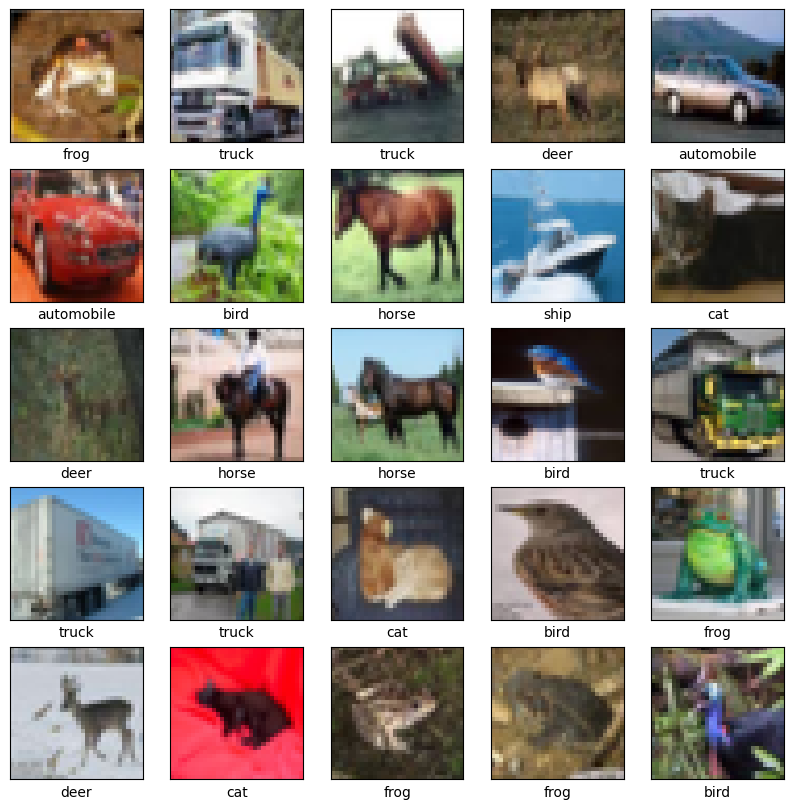

In [48]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_original[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[y_train_original[i][0]])
plt.show()

## Part I - Construct & Train models

### Create CNN

In [49]:
model_simple = models.Sequential()
model_simple.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_simple.add(layers.MaxPooling2D((2, 2)))
model_simple.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_simple.add(layers.MaxPooling2D((2, 2)))
model_simple.add(layers.Conv2D(128, (3, 3), activation='relu'))

In [50]:
model_simple.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
Total params: 93,248
Trainable params: 93,248
Non-trai

In [51]:
model_simple.add(layers.Flatten())
model_simple.add(layers.Dense(64, activation='relu'))
model_simple.add(layers.Dense(10))

In [52]:
model_simple.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten_2 (Flatten)         (None, 2048)             

In [54]:
model_simple.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

history = model_simple.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.0676 - accuracy: 0.4787 - val_loss: 0.0574 - val_accuracy: 0.5912
Epoch 2/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.0519 - accuracy: 0.6376 - val_loss: 0.0487 - val_accuracy: 0.6634
Epoch 3/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.0453 - accuracy: 0.6949 - val_loss: 0.0467 - val_accuracy: 0.6813
Epoch 4/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.0412 - accuracy: 0.7294 - val_loss: 0.0436 - val_accuracy: 0.7035
Epoch 5/10
1563/1563 [==============================] - 48s 30ms/step - loss: 0.0379 - accuracy: 0.7557 - val_loss: 0.0422 - val_accuracy: 0.7163
Epoch 6/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.0353 - accuracy: 0.7767 - val_loss: 0.0436 - val_accuracy: 0.7018
Epoch 7/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.0331 - accuracy: 0.7964 - val_loss: 0.0412 -

In [55]:
%store model_simple

Stored 'model_simple' (Sequential)


313/313 - 4s - loss: 0.0415 - accuracy: 0.7247 - 4s/epoch - 12ms/step


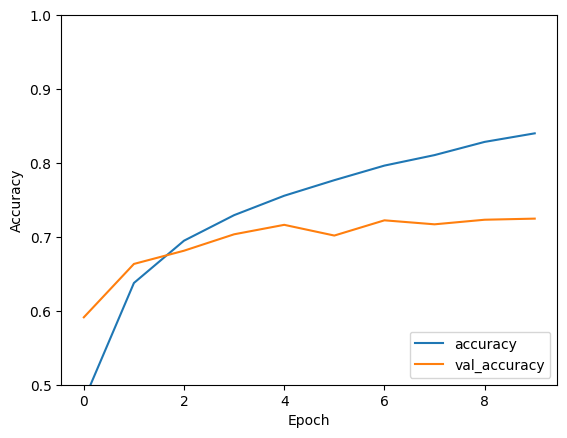

In [56]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_simple.evaluate(x_test,  y_test, verbose=2)

In [57]:
print(f"Accuracy score: {test_acc}")

Accuracy score: 0.7246999740600586


### Create ResNet50 base model

In [105]:
# Create the base DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a dense output layer with 10 units (one for each CIFAR-10 class)
predictions = Dense(10, activation='softmax')(x)

29084464/29084464 [==============================] - 3s 0us/step


In [106]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [107]:
# Compile the model
model.compile(optimizer=Adam(), loss='mse', metrics=['accuracy'])

In [108]:
# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
 320/1563 [=====>........................] - ETA: 11:37 - loss: 0.0765 - accuracy: 0.4073

KeyboardInterrupt: 

In [ ]:
%store model

In [ ]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

## Part II - Create Adversarial Model

### Fast Gradient Signed Method (FGSM) attack

In [59]:
# Function to calculate adversary noise
def generate_adversary(image, label, model):
  image = tf.cast(image, tf.float32)

  with tf.GradientTape() as tape:
    tape.watch(image)
    prediction = model(image)
    loss = tf.keras.losses.MSE(label, prediction)
  gradient = tape.gradient(loss, image)
  sign_grad = tf.sign(gradient)

  return sign_grad

Prediction from CNN: dog


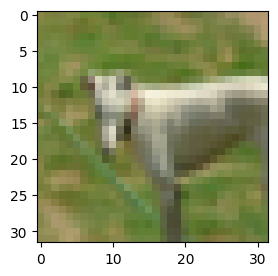

In [73]:
# Selecting random image for testing
rand_idx = randint(0,49999)
image = x_train[rand_idx].reshape((1, height, width, channels))
label = y_train[rand_idx]

print(f'Prediction from CNN: {class_names[np.where(label==1)[0][0]]}')
plt.figure(figsize=(3,3))
plt.imshow(image.reshape((height, width, channels)))
plt.show()

In [74]:
# Adding the adversary noise to image
perturbations = generate_adversary(image,label, model_simple).numpy()
adversarial = image + (perturbations * 0.05)

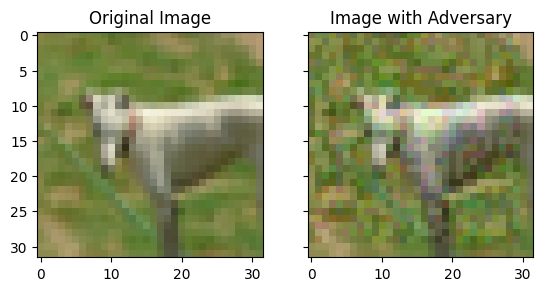

In [75]:
# Comparing both images
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(image.reshape(height,width, channels))
ax1.set_title("Original Image")
ax2.imshow(adversarial.reshape(height,width, channels))
ax2.set_title("Image with Adversary")
plt.show()

In [76]:
# Comparing predictions
print(f'Normal Image Prediction: {class_names[model_simple.predict(image).argmax()]}')
print(f"Adversary Prediction: {class_names[model_simple.predict(adversarial).argmax()]}")

1/1 [==============================] - 0s 24ms/step
Normal Image Prediction: dog
1/1 [==============================] - 0s 18ms/step
Adversary Prediction: bird


In [77]:
# Function to generate batch of images with adversary
def adversary_generator(batch_size, model):
  while True:
    images = []
    labels = []
    for batch in range(batch_size):
      N = randint(0, 49999)
      label = y_train[N]
      image = x_train[N].reshape((1,height, width, channels))

      perturbations = generate_adversary(image, label, model).numpy()
      adversarial = image + (perturbations * 0.1)

      images.append(adversarial)
      labels.append(label)

      if batch%1000 == 0:
        print(f"{batch} images generated")

    images = np.asarray(images).reshape((batch_size, height, width, channels))
    labels = np.asarray(labels)

    yield images, labels

In [72]:
# Testing model accuracy on adversarial examples
x_adversarial, y_adversarial = next(adversary_generator(10000, model_simple))
ad_acc = model_simple.evaluate(x_adversarial, y_adversarial, verbose=0)
print(f"Accuracy on Adversarial Examples: {ad_acc[1]*100}")

0 images generated
1000 images generated
2000 images generated
3000 images generated
4000 images generated
5000 images generated
6000 images generated
7000 images generated
8000 images generated
9000 images generated
Accuracy on Adversarial Examples: 21.619999408721924


### Basic Iterative Method (BIM)

In [78]:
# Define epsilon and number of iterations for the attack
epsilon = 0.03
num_iterations = 10
alpha = epsilon / num_iterations

In [79]:
# BIM adversarial attack
def bim_attack(model, x, y, epsilon, num_iterations, alpha):
    x_adv = tf.identity(x)

    for _ in range(num_iterations):
        with tf.GradientTape() as tape:
            tape.watch(x_adv)
            logits = model(x_adv)
            loss = tf.keras.losses.CategoricalCrossentropy()(y, logits)

        gradients = tape.gradient(loss, x_adv)
        gradients = tf.sign(gradients)
        x_adv = x_adv + alpha * gradients
        x_adv = tf.clip_by_value(x_adv, x - epsilon, x + epsilon)
        x_adv = tf.clip_by_value(x_adv, 0, 1)

    return x_adv

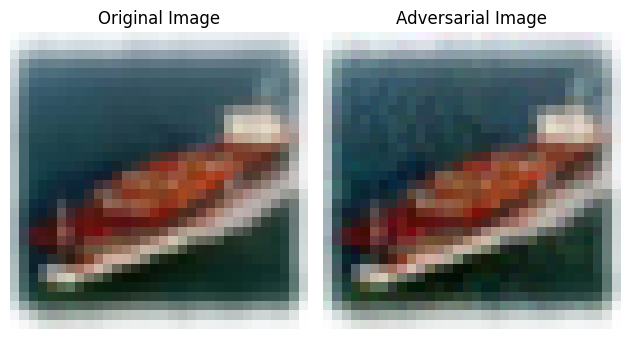

In [93]:
# Select a random image from the test set
index = np.random.randint(0, len(x_test))
image = x_test[index]
true_label = y_test[index]

# Perform BIM attack on the selected image
image = tf.expand_dims(image, axis=0)
label = tf.expand_dims(y_test[index], axis=0)
adversarial_image = bim_attack(model_simple, image, label, epsilon, num_iterations, alpha).numpy()[0]

# Display the original and adversarial images
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image[0])
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Adversarial Image")
plt.imshow(adversarial_image)
plt.axis('off')

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 26ms/step


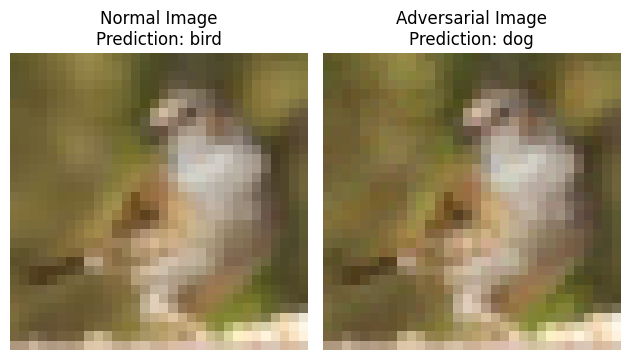

In [89]:
# Make predictions on the normal and adversarial images
normal_predictions = model_simple.predict(image)
adversarial_predictions = model_simple.predict(adversarial_image.reshape(1, 32, 32, 3))

# Convert predictions to class labels
normal_label = np.argmax(normal_predictions)
adversarial_label = np.argmax(adversarial_predictions)

# Display the normal and adversarial images along with the predicted labels
plt.subplot(1, 2, 1)
plt.title(f"Normal Image\nPrediction: {class_names[normal_label]}")
plt.imshow(image[0])
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Adversarial Image\nPrediction: {class_names[adversarial_label]}")
plt.imshow(adversarial_image)
plt.axis('off')

plt.tight_layout()
plt.show()

In [90]:
def evaluate_model_accuracy(model, x, y, epsilon, num_iterations, alpha):
    x_adv = bim_attack(model, x, y, epsilon, num_iterations, alpha)
    adv_predictions = model.predict(x_adv)
    y_pred = np.argmax(adv_predictions, axis=1)
    y_true = np.argmax(y, axis=1)
    accuracy = np.mean(y_pred == y_true)
    return accuracy

In [91]:
accuracy = evaluate_model_accuracy(model_simple, x_test, y_test, epsilon, num_iterations, alpha)
print(f"Accuracy on adversarial examples: {accuracy}")

313/313 [==============================] - 4s 13ms/step
Accuracy on adversarial examples: 0.2027
